In [13]:
import numpy as np
import pyart
import matplotlib.pyplot as plt
import os
#import seaborn as sns; sns.set()
from sklearn.mixture import GaussianMixture
import pickle
from netCDF4 import num2date, date2num
import math

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import geopandas as gpd
import metpy
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.io.img_tiles as cimgt
import glob
import pandas as pd
from cartopy.io.img_tiles import MapboxTiles
#from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [8]:
def dt_parser(ts):
    return pd.to_datetime(ts, format='%Y %m %d %H %M %S',utc=True)

def load_lightning_data(path,header):
    lightning = pd.read_csv(path,names=header,parse_dates=[[0,1,2,3,4,5]],date_parser=dt_parser)
    lightning.rename(columns={'_'.join(header[0:6]):'datetime'},inplace=True)
    lightning = lightning.set_index(['datetime'])
    return lightning

def select_between_dt(lightning,end,start=None,delta='15T'):
    if start is None:
        start = end - pd.Timedelta('15T')
    df = lightning.loc[start.strftime('%Y-%m-%d %H:%M:%S'):end.strftime('%Y-%m-%d %H:%M:%S')].copy()
    return df
def plot_lightning(lightning,**kwargs):
    ax.scatter(lightning.lon,lightning.lat,transform=ccrs.PlateCarree(),**kwargs)
    return

header = ['year', 'month', 'day', 'hour', 'minute', 'second', 'millisecond', 'lat', 'lon', 'current']
lightning = load_lightning_data('./datasets/lightning_data/Sedgerly_GPATS.txt',header=header)

In [9]:
 with open("./mbox_key.txt", "r") as f:
        mbox_key = f.read()

In [10]:
min_lon, min_lat, max_lon, max_lat = [151,-28.3,151.58,-28.04]
x0x1y0y1 = [min_lon, max_lon, max_lat, min_lat]

In [11]:
def formatmap(ax):
    gl = ax.gridlines(draw_labels=True, alpha=0.2)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax

In [12]:
plot_set_timestamps_15M = pickle.load( open( "./datasets/plot_set_timestamps_15M.pickle", "rb" ) )

## Create Cartopy basemap with mapbox tiles

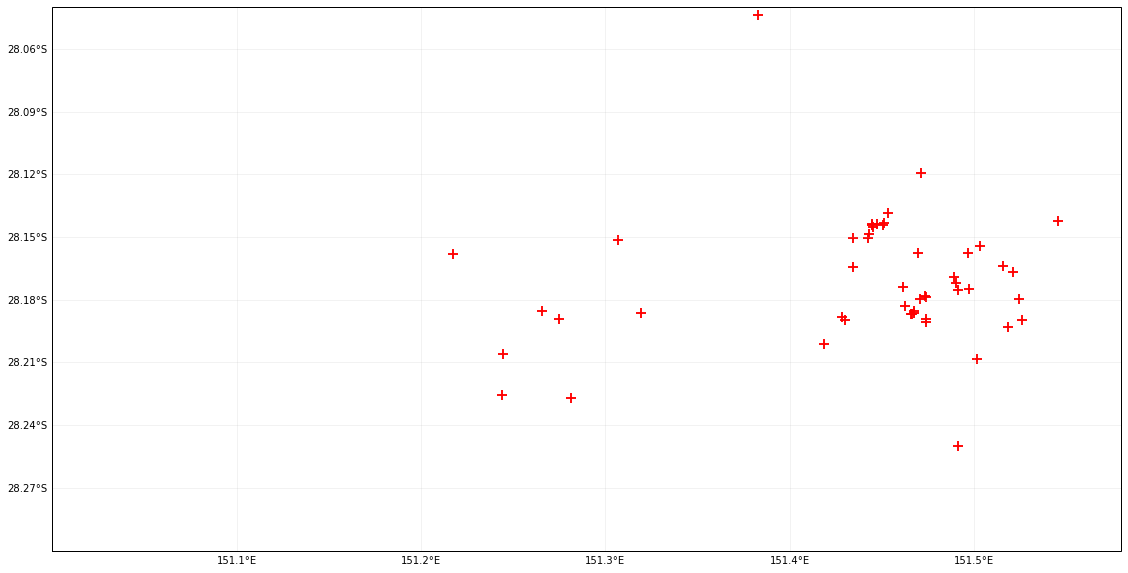

In [79]:
target_tz = 'Australia/Brisbane'
target_tz_name = 'AEST'
time_str_format_map = '%d/%m/%Y %H:%M'

fig = plt.figure(figsize=(20,10))
tiler = MapboxTiles(mbox_key,'outdoors')
mercator = tiler.crs

ax = plt.axes(projection=mercator)
ax.set_extent(x0x1y0y1, crs=ccrs.PlateCarree())
#ax.add_image(tiler, 13,interpolation='bilinear')
ax = formatmap(ax)

lightning_kwargs = {'color':'red','marker':'+','s':100}
plot_lightning(select_between_dt(lightning,plot_set_timestamps_15M[-1]),**lightning_kwargs)

plt.show()


In [90]:
lightning.head()

,millisecond,lat,lon,current
datetime,,,,
2016-12-04 04:37:33+00:00,905,-28.25830,151.09743,-15.8
2016-12-04 04:38:07+00:00,688,-28.29558,151.07979,-38.8
2016-12-04 04:38:07+00:00,775,-28.29121,151.06638,-13.5
2016-12-04 04:38:07+00:00,832,-28.29400,151.07751,-17.7
2016-12-04 04:38:07+00:00,880,-28.29619,151.07529,-40.7


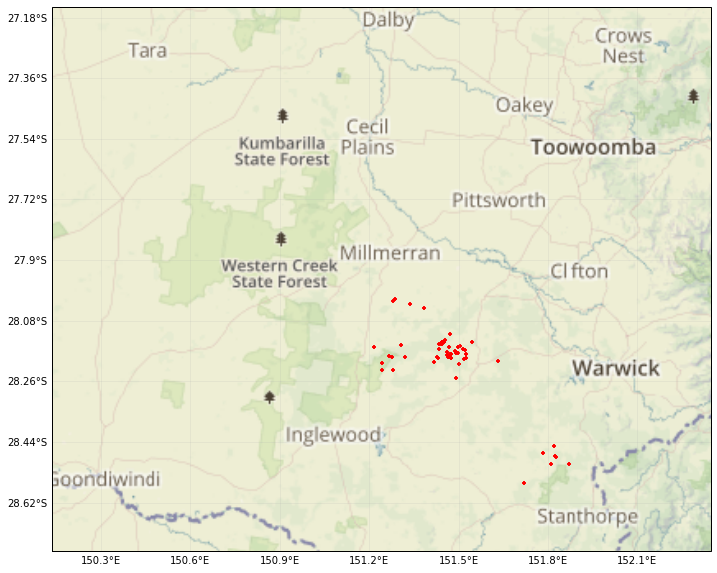

In [127]:
target_tz = 'Australia/Brisbane'
target_tz_name = 'AEST'
time_str_format_map = '%d/%m/%Y %H:%M'

fig = plt.figure(figsize=(20,10))
tiler = MapboxTiles(mbox_key,'outdoors')
mercator = tiler.crs

ax = plt.axes(projection=mercator)
ax.add_image(tiler, 8,interpolation='bilinear')

#min_lon, min_lat, max_lon, max_lat = [151,-28.3,151.58,-28.04]
x0x1y0y1 = [lightning.lon.min(), lightning.lon.max(), lightning.lat.max(), lightning.lat.min()]
ax.set_extent(x0x1y0y1, crs=ccrs.PlateCarree())
lightning_kwargs = {'color':'red','marker':'+','s':10}
plot_lightning(select_between_dt(lightning,plot_set_timestamps_15M[-1]),**lightning_kwargs)
ax = formatmap(ax)
plt.show()


In [15]:
x0x1y0y1 = [lightning.lon.min(), lightning.lon.max(), lightning.lat.max(), lightning.lat.min()]


In [16]:
x0x1y0y1

[150.13663, 152.34581, -27.147920000000003, -28.75955]